# User Guide

In [1]:
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

from Modules.ShapeShadow import Sector
from Modules import Beamer, JAW

## Load Data

Use the JAW tool to load J.A.Woollam data from *.txt file

In [2]:
# Load environment variables
load_dotenv()

DATA_PATH = os.getenv("DATA_PATH")
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(DATA_PATH)

In [3]:
# Load the data
jaw = JAW.JAW(DATA_PATH)

# Pull x and y coordinates from data
x, y = jaw.data.x, jaw.data.y

## Define a MapPattern

The map pattern defines where on the sample measurements has been taken. It takes an x,y-component along with tranlational and rotational offsets.

In [4]:
# Offset are: x = 0cm, y = 2.0cm, theta = 4.1 deg
map_pattern = Beamer.MapPattern(x, y, x_offset=0, y_offset=2, theta_offset=4.1)

## Define a Spot

A spot defines the geometry of the bream hitting the sample. Takes a bream diameter and its angle of incident.

In [5]:
# For spot we'll use spot size 0.3mm (remember to keep units consistent ie. )
spot = Beamer.Spot(diameter=0.03, angle_incident=65)

TypeError: Spot.__init__() got an unexpected keyword argument 'diameter'

## Define a SpotCollection

A spot collection take a MapPattern and Spot object that holds all the geometric information related to a measurement on a sample.

In [ ]:
# We'll use the MapPattern and Spot object created above.
sc = Beamer.SpotCollection(map_pattern, spot)

## Defining Sample

Following shapes are available:
- Circle
- Sector
- Ellipse
- Rectangle
- Square

In [ ]:
# We'll use the Sector class to define a "pizza-slice" kinda shape
# radius: 2in (1in = 2.54cm), angular sweep: 90 deg
sample = Sector(radius=2*2.54, angle_sweep=90)

# Offset rotation: 225+4.1 deg + translation: x=0cm, y=2.5cm
sample.rotate(225 + 4.1).translate(x_offset=0, y_offset=2.5)

## Plotting

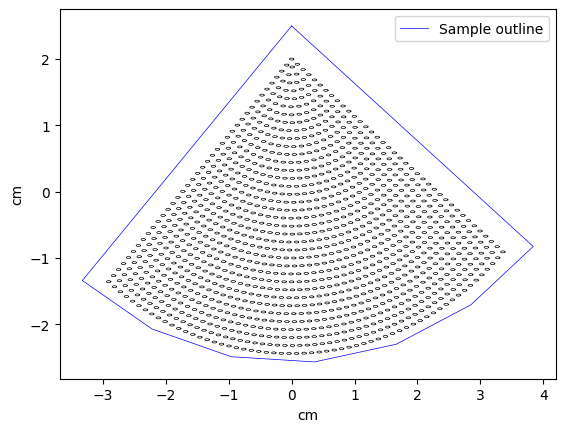

In [ ]:
fig, ax = plt.subplots()

# Plot sample outline
ax.plot(sample.x, sample.y, 'b-', linewidth=0.5, label='Sample outline')

# Plot spots on sample
for ellipse in sc.outlines():
    ax.plot(ellipse.x, ellipse.y, '-k', linewidth=0.5)

ax.set_xlabel('cm')
ax.set_ylabel('cm')

plt.legend()
plt.show()
